### 1.1.8.4. Covariant and Contravariant Components

**Contravariant components** via Cramer's Rule:

$$
\vec{A} = A^1 \vec{e}_1 + A^2 \vec{e}_2
\qquad\Longrightarrow\qquad
A^i = \frac{\det(\text{replace column } i \text{ of } [\vec{e}_1 \;|\; \vec{e}_2] \text{ with } \vec{A})}{\det([\vec{e}_1 \;|\; \vec{e}_2])}
$$

**Covariant components** via dot product:

$$
A_i = \vec{A} \cdot \vec{e}_i
$$

**Contravariant components** via dot product with dual basis:

$$
A^i = \vec{A} \cdot \vec{e}^{\,i}
$$

**Invariance:**

$$
\vec{A} = A^i \vec{e}_i = A_i \vec{e}^{\,i}
$$

**Explanation:**

Any vector in a non-orthogonal coordinate system can be decomposed into two equivalent sets of components. The **contravariant** components $A^i$ are found by parallel-projecting the vector onto each coordinate axis (light parallel to the other axis). The **covariant** components $A_i$ are found by perpendicular-projecting the vector onto each axis (orthogonal drop).

<p align="center">
<img src="../../../Figures/01010804_non_orthogonal_basis_vectors.jpeg" alt="Non-orthogonal basis vectors" width="350">
</p>

*Figure 4.15 — Vector $\vec{A}$ with non-orthogonal basis vectors $\vec{e}_1$ and $\vec{e}_2$ (Fleisch, 2012).*

Three methods yield the contravariant components:
1. **Cramer's Rule** — solve the linear system $\vec{A} = A^1 \vec{e}_1 + A^2 \vec{e}_2$ directly.
2. **Dot product with dual basis** — $A^i = \vec{A} \cdot \vec{e}^{\,i}$.
3. **Geometric construction** — parallel projection onto the basis directions.

<p align="center">
<img src="../../../Figures/01010804_parallel_projections_original_basis.jpeg" alt="Parallel projections onto original basis" width="500">
</p>

*Figure 4.16 — Parallel projections of $\vec{A}$ onto $\vec{e}_1$ and $\vec{e}_2$ give contravariant components (Fleisch, 2012).*

The covariant components are obtained most simply via $A_i = \vec{A} \cdot \vec{e}_i$. They reconstruct the vector when combined with the dual basis: $\vec{A} = A_i \vec{e}^{\,i}$.

<p align="center">
<img src="../../../Figures/01010804_perpendicular_projections_dual_basis.jpeg" alt="Perpendicular projections onto dual basis" width="500">
</p>

*Figure 4.17 — Perpendicular projections of $\vec{A}$ onto $\vec{e}^{\,1}$ and $\vec{e}^{\,2}$ give covariant components (Fleisch, 2012).*

It is not the vector itself that is "covariant" or "contravariant" — it is the *type of component*. Every vector possesses both types, and combining contravariant components with covariant basis vectors (or vice versa) produces the invariant vector.

**Example:**

Given $\vec{e}_1 = (1, 3)$, $\vec{e}_2 = (4, 0)$, and $\vec{A} = (7, 2)$:

**Contravariant** (Cramer's Rule):

$$
A^1 = \frac{\begin{vmatrix}7 & 4 \\ 2 & 0\end{vmatrix}}{\begin{vmatrix}1 & 4 \\ 3 & 0\end{vmatrix}} = \frac{-8}{-12} = 0.667, \qquad
A^2 = \frac{\begin{vmatrix}1 & 7 \\ 3 & 2\end{vmatrix}}{\begin{vmatrix}1 & 4 \\ 3 & 0\end{vmatrix}} = \frac{-19}{-12} = 1.583
$$

**Covariant** (dot product):

$$
A_1 = \vec{A} \cdot \vec{e}_1 = 7 \cdot 1 + 2 \cdot 3 = 13, \qquad
A_2 = \vec{A} \cdot \vec{e}_2 = 7 \cdot 4 + 2 \cdot 0 = 28
$$

In [1]:
import numpy as np

basis_1 = np.array([1.0, 3.0])
basis_2 = np.array([4.0, 0.0])
vector_a = np.array([7.0, 2.0])

basis_matrix = np.column_stack([basis_1, basis_2])
contravariant = np.linalg.solve(basis_matrix, vector_a)

covariant = np.array([
    np.dot(vector_a, basis_1),
    np.dot(vector_a, basis_2)
])

basis_3d_1 = np.array([basis_1[0], basis_1[1], 0.0])
basis_3d_2 = np.array([basis_2[0], basis_2[1], 0.0])
unit_z = np.array([0.0, 0.0, 1.0])

triple_scalar = np.dot(basis_3d_1, np.cross(basis_3d_2, unit_z))
dual_1_3d = np.cross(basis_3d_2, unit_z) / triple_scalar
dual_2_3d = np.cross(unit_z, basis_3d_1) / triple_scalar
dual_1 = dual_1_3d[:2]
dual_2 = dual_2_3d[:2]

contravariant_via_dual = np.array([
    np.dot(vector_a, dual_1),
    np.dot(vector_a, dual_2)
])

reconstructed_contra = contravariant[0] * basis_1 + contravariant[1] * basis_2
reconstructed_covar = covariant[0] * dual_1 + covariant[1] * dual_2

print("Contravariant (Cramer):     ", np.round(contravariant, 4))
print("Contravariant (dot dual):   ", np.round(contravariant_via_dual, 4))
print("Covariant (dot original):   ", np.round(covariant, 4))
print("\nReconstructed (A^i e_i):    ", np.round(reconstructed_contra, 4))
print("Reconstructed (A_i e^i):    ", np.round(reconstructed_covar, 4))
print("Original vector:            ", vector_a)

Contravariant (Cramer):      [0.6667 1.5833]
Contravariant (dot dual):    [0.6667 1.5833]
Covariant (dot original):    [13. 28.]

Reconstructed (A^i e_i):     [7. 2.]
Reconstructed (A_i e^i):     [7. 2.]
Original vector:             [7. 2.]


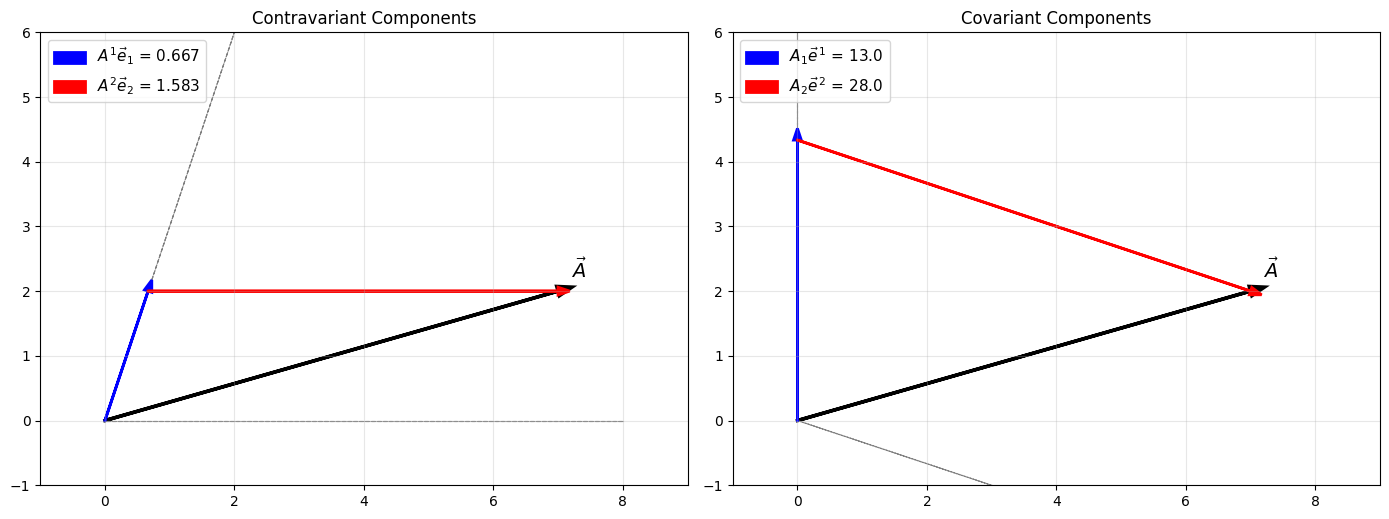

In [2]:
import matplotlib.pyplot as plt

basis_1 = np.array([1.0, 3.0])
basis_2 = np.array([4.0, 0.0])
vector_a = np.array([7.0, 2.0])

basis_matrix = np.column_stack([basis_1, basis_2])
contravariant = np.linalg.solve(basis_matrix, vector_a)

basis_3d_1 = np.array([basis_1[0], basis_1[1], 0.0])
basis_3d_2 = np.array([basis_2[0], basis_2[1], 0.0])
unit_z = np.array([0.0, 0.0, 1.0])
triple_scalar = np.dot(basis_3d_1, np.cross(basis_3d_2, unit_z))
dual_1 = np.cross(basis_3d_2, unit_z)[:2] / triple_scalar
dual_2 = np.cross(unit_z, basis_3d_1)[:2] / triple_scalar

covariant = np.array([np.dot(vector_a, basis_1), np.dot(vector_a, basis_2)])

figure, (axis_contra, axis_covar) = plt.subplots(1, 2, figsize=(14, 6))

scale = 8
for axis in [axis_contra, axis_covar]:
    axis.arrow(0, 0, vector_a[0], vector_a[1], head_width=0.15, color="black", linewidth=2.5)
    axis.text(vector_a[0] + 0.2, vector_a[1] + 0.2, r"$\vec{A}$", fontsize=14)

e1_direction = basis_1 / np.linalg.norm(basis_1)
e2_direction = basis_2 / np.linalg.norm(basis_2)
axis_contra.arrow(0, 0, scale * e1_direction[0], scale * e1_direction[1], head_width=0, color="gray", linewidth=0.8, linestyle="--")
axis_contra.arrow(0, 0, scale * e2_direction[0], scale * e2_direction[1], head_width=0, color="gray", linewidth=0.8, linestyle="--")

comp_1 = contravariant[0] * basis_1
comp_2 = contravariant[1] * basis_2
axis_contra.arrow(0, 0, comp_1[0], comp_1[1], head_width=0.12, color="blue", linewidth=2, label=rf"$A^1 \vec{{e}}_1$ = {contravariant[0]:.3f}")
axis_contra.arrow(comp_1[0], comp_1[1], comp_2[0], comp_2[1], head_width=0.12, color="red", linewidth=2, label=rf"$A^2 \vec{{e}}_2$ = {contravariant[1]:.3f}")
axis_contra.set_title("Contravariant Components")
axis_contra.legend(loc="upper left", fontsize=11)
axis_contra.set_xlim(-1, 9)
axis_contra.set_ylim(-1, 6)
axis_contra.set_aspect("equal")
axis_contra.grid(True, alpha=0.3)

dual_scale = 50
d1_direction = dual_1 / np.linalg.norm(dual_1)
d2_direction = dual_2 / np.linalg.norm(dual_2)
axis_covar.arrow(0, 0, dual_scale * d1_direction[0], dual_scale * d1_direction[1], head_width=0, color="gray", linewidth=0.8, linestyle="--")
axis_covar.arrow(0, 0, dual_scale * d2_direction[0], dual_scale * d2_direction[1], head_width=0, color="gray", linewidth=0.8, linestyle="--")

covar_comp_1 = covariant[0] * dual_1
covar_comp_2 = covariant[1] * dual_2
axis_covar.arrow(0, 0, covar_comp_1[0], covar_comp_1[1], head_width=0.12, color="blue", linewidth=2, label=rf"$A_1 \vec{{e}}^{{\,1}}$ = {covariant[0]:.1f}")
axis_covar.arrow(covar_comp_1[0], covar_comp_1[1], covar_comp_2[0], covar_comp_2[1], head_width=0.12, color="red", linewidth=2, label=rf"$A_2 \vec{{e}}^{{\,2}}$ = {covariant[1]:.1f}")
axis_covar.set_title("Covariant Components")
axis_covar.legend(loc="upper left", fontsize=11)
axis_covar.set_xlim(-1, 9)
axis_covar.set_ylim(-1, 6)
axis_covar.set_aspect("equal")
axis_covar.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**References:**

[📘 Fleisch, D. (2012). *A Student's Guide to Vectors and Tensors*, §4.6](https://www.cambridge.org/highereducation/books/a-students-guide-to-vectors-and-tensors/39A82E78925B5CEAD0C3D00E4C381BBE)

---

[⬅️ Previous: Dual Basis Vectors](./03_dual_basis_vectors.ipynb) | [Next: Index Notation and Summation Convention ➡️](./05_index_notation_and_summation_convention.ipynb)